In [289]:
from skimage import segmentation, filters, measure
from skimage.feature import canny
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from IPython.display import display

plt.set_cmap(plt.gray())

%matplotlib inline

(array([[189, 189, 187, ..., 193, 192, 191],
        [188, 188, 187, ..., 193, 192, 189],
        [188, 189, 191, ..., 192, 192, 191],
        ..., 
        [192, 193, 194, ..., 197, 177, 175],
        [149, 150, 150, ..., 185, 183, 182],
        [140, 140, 139, ..., 185, 183, 183]], dtype=uint8), (76, 229))

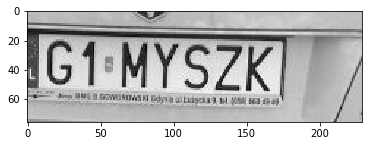

In [290]:
# fp = '../data/Z3_ICE_plate_0.jpg'
# fp = '../data/images_plates/D1_JZO14_plate_0.jpg'
# fp = '../data/images_plates/D1_MAKAR_plate_0.jpg'
# fp = '../data/images_plates/W0_IPECO_plate_0.jpg'

fn = 'G1_MYSZK_plate_0.jpg'
# fn = 'W0_IPECO_plate_0.jpg'

DIR = '../data/images_plates/'
fp = os.path.join(DIR, fn)
img = s = cv2.imread(fp, 0)

# sobel, threshold, sobel, watershed

plt.imshow(img)
img, img.shape

(array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]], dtype=bool),
 (76, 229),
 dtype('bool'))

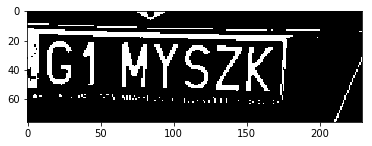

In [291]:
from skimage.filters import sobel

coins = img < filters.threshold_minimum(img)

plt.imshow(coins)
coins, coins.shape, coins.dtype

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8), (76, 229), dtype('int8'))

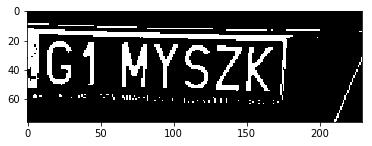

In [292]:
labeled_coins, a = ndi.label(coins)
labeled_coins = (labeled_coins > 1).astype(np.int8)
plt.imshow(labeled_coins)
labeled_coins, labeled_coins.shape, labeled_coins.dtype

In [293]:
c = measure.find_contours(labeled_coins, .1)

In [294]:
l = []
for i, v in enumerate(c):
    xs, ys = zip(*[i for i in v])
    x = int(min(xs))
    y = int(min(ys))
    w = int(max(xs) - x + 2)
    h = int(max(ys) - y + 2)
    if w < 15:
        continue
    l.append((y, x, h, w))
    
l = sorted(l)
l

[(0, 11, 183, 45),
 (13, 20, 19, 32),
 (37, 21, 10, 31),
 (64, 21, 19, 32),
 (86, 22, 18, 32),
 (107, 23, 19, 31),
 (128, 23, 20, 33),
 (149, 24, 20, 32)]

In [295]:
ll = [img[x:x+w, y:y+h] for y,x,h,w in l]

# ll = [i for i in ll if i[0,0] > 127]

In [296]:
plate = fn.replace('_', '').split('plate')[0]

In [297]:
sizes = [image.size for image in ll]
median = np.median(sizes)
allowed_size = median + median/8
display(median)

ll = [image for image in ll if image.size < allowed_size]
    
display([image.size for image in ll])

608.0

[608, 310, 608, 576, 589, 660, 640]

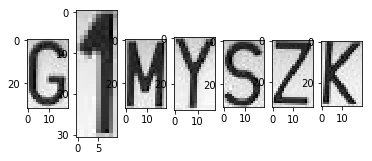

In [298]:
d = [(i.shape[0] * i.shape[1], i) for i in ll]
len(d)
fig, axs = plt.subplots(1, len(ll))
for i, (v, letter) in enumerate(zip(ll, plate)):
    axs[i].imshow(v)
#     plt.imsave(f'd/{letter}.jpg', v)

In [299]:
[i[0] for i in sorted(d, key=lambda x: x[0])]
[i[0] for i in d]

[608, 310, 608, 576, 589, 660, 640]